In [1]:
# %%
from POSEIDON.core import create_star, create_planet
from POSEIDON.constants import R_Sun, R_J, M_J
from POSEIDON.visuals import *
import pickle

R_s = 1.458 * R_Sun  # Stellar radius (m)
T_s = 6776  # Stellar effective temperature (K)
Met_s = 0.13  # Stellar metallicity [log10(Fe/H_star / Fe/H_solar)]
log_g_s = 4.24  # Stellar log surface gravity (log10(cm/s^2) by convention)

planet_name = "WASP-121b"  # Planet name used for plots, output files etc.

R_p = 1.753 * R_J  # Planetary radius (m)
# R_p = 0.118 * R_s
M_p = 1.157 * M_J  # Mass of planet (kg)
g_p = 10 ** (2.97 - 2)  # Gravitational field of planet (m/s^2)
T_eq = 2450  # Equilibrium temperature (K)

# Create the planet object
planet = create_planet(planet_name, R_p, mass=M_p, gravity=g_p, T_eq=T_eq)

from POSEIDON.core import define_model

bulk_species = ["H2", "He"]  # H2 + He comprises the bulk atmosphere
param_species = ["Fe", "Cr", "V"]  # H2O, CO as in Brogi & Line

method = "sysrem"
high_res_params = ["K_p", "V_sys", "W_conv", "log_a"]

model_1 = define_model(
    "Fe, Cr, V isotherm fix Rp",
    bulk_species,
    param_species,
    PT_profile="isotherm",
    high_res_params=high_res_params,
    reference_parameter="None",
)


model_2 = define_model(
    "Fe, Cr, V isotherm",
    bulk_species,
    param_species,
    PT_profile="isotherm",
    high_res_params=high_res_params,
    reference_parameter="R_p_ref",
)

/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /export/data1/3datmo/inputs/stellar_grids/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /export/data1/3datmo/inputs/stellar_grids/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/home/ruizhew/.conda/envs/poseidon/lib/python3.9/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /export/data1/3datmo/inputs/stellar_grids/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '


Generating corner plot 0...
Generating corner plot 1...


ValueError: Mismatch between axes and dimension.

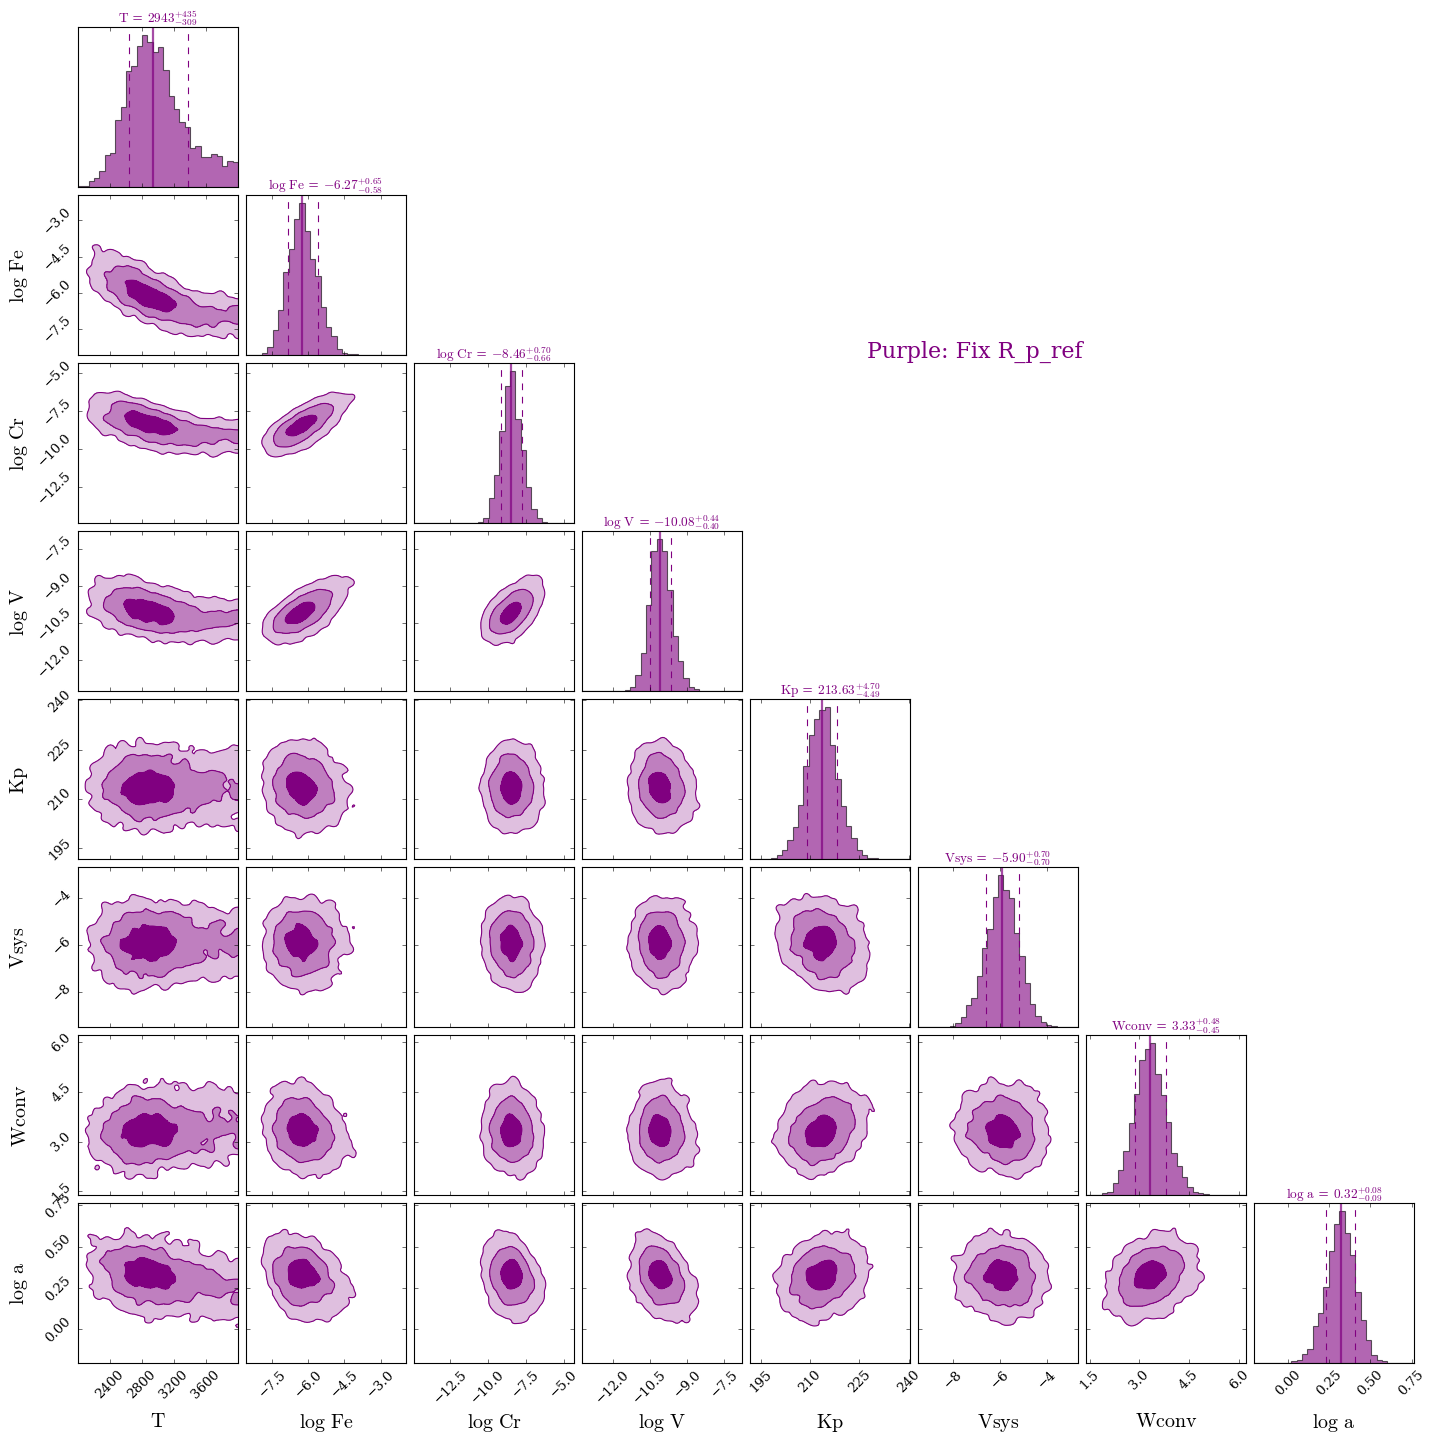

In [2]:
from POSEIDON.corner import generate_cornerplot, generate_overplot
import matplotlib.pyplot as plt

params_to_plot = ["T", "W_conv", "log_a"]
fig = generate_overplot(
    planet,
    [model_1, model_2],
    params_to_plot=None,
    model_display_names=["Fix R_p_ref", "Free R_p_ref"],
    # true_vals=[-4, -4, 192.6, -6.8],
    truth_colour="red",
    colour_schemes=["purple", "green"],
)

Generating corner plot ...


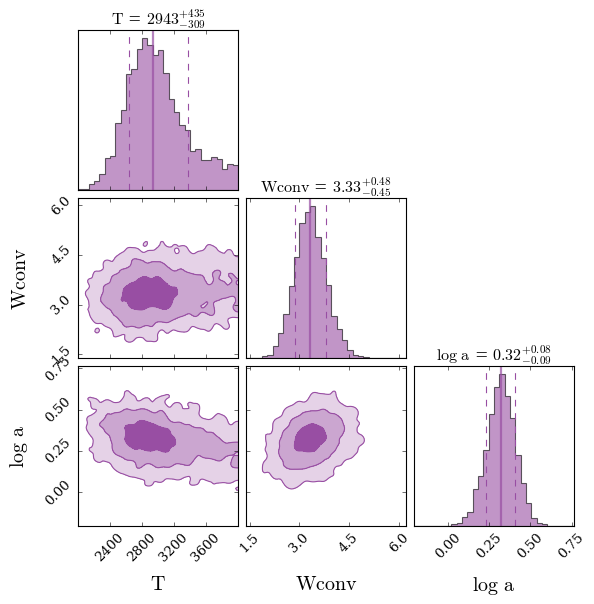

In [4]:
from POSEIDON.corner import generate_cornerplot, generate_overplot
import matplotlib.pyplot as plt

params_to_plot = ["T", "W_conv", "log_a"]
fig = generate_cornerplot(
    planet,
    model_1,
    params_to_plot=params_to_plot,
)